In [2]:
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np

X = [[0],[1],[2],[3]]
y = [0,0,1,1]

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X,y)
print(neigh.predict([[1.1]]))
print(neigh.predict_proba([[0.9]]))

[0]
[[0.66666667 0.33333333]]


In [3]:
classifier = KNeighborsClassifier(n_neighbors=3, weights="distance", metric="euclidean")

training_points = [
    [0.5,0.2,0.1],
    [0.9,0.7,0.3],
    [0.4,0.5,0.7]
]
training_labels = [0,1,1]
classifier.fit(training_points, training_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='distance')

Weight: k개의 이웃 중 거리가 가까운 이웃의 영향을 더 많이 받도록 하는 가중치

Leaf_size: 트리에서 몇 대 몇으로 나눠서 뻗어 나갈지를 나타내는 값 / 분류 예측 성능

metric: 거리 측정 방식을 변경하는 매개변수로 디폴트값은 minkowsi

metric_params: 메트릭 함수의 추가 키워드. 디폴트는 None

n_jobs: 이웃을 검색하기 위해 실행하는 병렬 작업수

n_neighbors: 검색할 이웃수. 디폴트=5

p: minkowski의 매개변수

Weights는 예측에 사용하는 가중치로 uniform은 각 이웃에 동일한 가중치를,
distance는 가까운 이웃이 멀리 있는 이웃보다 더욱 큰 가중치를 주게 함.

In [5]:
unknown_points = [
    [0.2,0.1,0.7],
    [0.4,0.7,0.6],
    [0.5,0.8,0.1]
]

guesses = classifier.predict(unknown_points)
print(guesses)
from sklearn import metrics
print("Accuracy: ",metrics.accuracy_score(training_labels, guesses))

from sklearn.metrics import classification_report
print(classification_report(training_labels,guesses))

[1 1 1]
Accuracy:  0.6666666666666666
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.67      1.00      0.80         2

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [10]:
from sklearn import datasets
%matplotlib inline

iris = datasets.load_iris()
print(iris.feature_names)

# sepal length랑 width만 컬럼으로
X = iris.data[:,:4]
y = iris.target

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [12]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

X = pd.DataFrame(X_scaled, columns=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)'])

# X.columns = iris.feature_names
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


In [13]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=30)

clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(x_train, y_train)

print(clf.score(x_test, y_test))

0.9333333333333333


In [14]:
from sklearn.model_selection import cross_val_score # K겹 교차검정

scores = cross_val_score(classifier,X,y,cv=5,scoring='accuracy')
print(scores)
print(scores.mean())

[0.96666667 0.96666667 0.93333333 0.9        1.        ]
0.9533333333333334


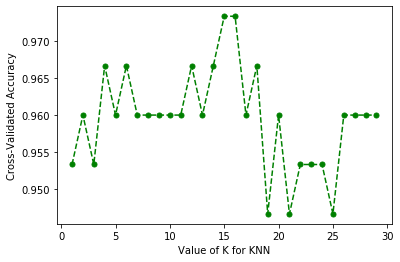

In [15]:
from sklearn import model_selection
import matplotlib.pyplot as plt

k_range = range(1,30)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = model_selection.cross_val_score(knn,X,y,cv=5,scoring='accuracy')
    k_scores.append(scores.mean())

# 시각화
plt.plot(k_range, k_scores, marker='o', color='green', linestyle='dashed', markersize=5)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

(404, 13) (102, 13)
RMSE value for k =  1 is:  6.533458382156615
RMSE value for k =  2 is:  5.709593749498621
RMSE value for k =  3 is:  4.6539825286421435
RMSE value for k =  4 is:  4.906214796301827
RMSE value for k =  5 is:  5.0852851926117255
RMSE value for k =  6 is:  5.3050110934403385
RMSE value for k =  7 is:  5.437776362145272
RMSE value for k =  8 is:  5.7766325625103505
RMSE value for k =  9 is:  5.9162730135904535
RMSE value for k =  10 is:  6.032231158128644
RMSE value for k =  11 is:  6.015260127343712
RMSE value for k =  12 is:  6.032981417805106
RMSE value for k =  13 is:  5.934959335454073
RMSE value for k =  14 is:  5.943177815362587
RMSE value for k =  15 is:  6.055387525401548
RMSE value for k =  16 is:  6.0659727962688335
RMSE value for k =  17 is:  6.1682431059235165
RMSE value for k =  18 is:  6.185559955314015
RMSE value for k =  19 is:  6.184915007192077


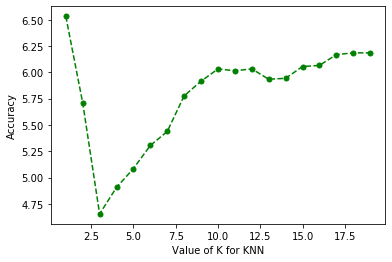

In [17]:
# KNN 회귀 알고리즘
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from math import sqrt
import pandas as pd

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

k_range = range(1,20)

rmse_val = []
for K in range(1,20):
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    error = sqrt(mean_squared_error(y_test,pred))
    rmse_val.append(error)
    print('RMSE value for k = ',K,'is: ',error)
    
plt.plot(k_range, rmse_val, marker='o', color='green', linestyle='dashed', markersize=5)
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy')
plt.show()

k가 3일 때 RMSE가 최저값을 가지니까, K를 3으로 할 때 최적화모델이 나오겠다!!

In [1]:
from sklearn.datasets import load_breast_cancer
breast_cancer_data = load_breast_cancer()

In [3]:
import pandas as pd
X_Data = pd.DataFrame(breast_cancer_data.data)
y = pd.DataFrame(breast_cancer_data.target)

In [4]:
y.head()

,0
0,0
1,0
2,0
3,0
4,0


In [5]:
print(breast_cancer_data.target_names)

['malignant' 'benign']


In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_Data)
X_scaled = scaler.transform(X_Data)

X = pd.DataFrame(X_scaled)

X.columns = breast_cancer_data.feature_names
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [8]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

398
171
398
171


In [9]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)

In [10]:
classifier.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [11]:
print(classifier.score(X_test, y_test))

0.9590643274853801


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A

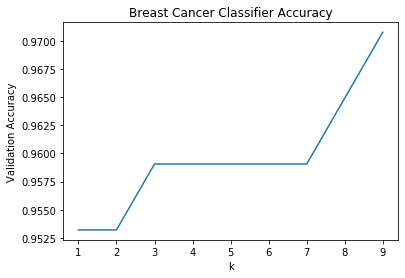

In [13]:
import matplotlib.pyplot as plt
k_list = range(1,10)
accuracies = []
for k in k_list:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train, y_train)
    accuracies.append(classifier.score(X_test, y_test))
plt.plot(k_list, accuracies)
plt.xlabel('k')
plt.ylabel('Validation Accuracy')
plt.title('Breast Cancer Classifier Accuracy')
plt.show()

In [15]:
from sklearn.model_selection import cross_val_score #k겹 교차검증

scores = cross_val_score(classifier, X, y, cv=5, scoring='accuracy')
print(scores)
print(scores.mean())

[0.96491228 0.94736842 0.99122807 0.95614035 0.98230088]
0.968390001552554


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


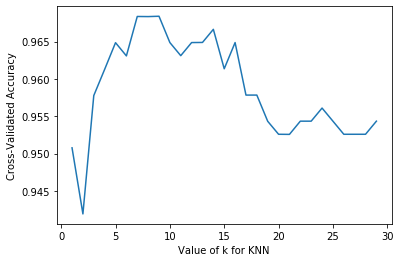

In [17]:
from sklearn import model_selection
k_range = range(1,30)

k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = model_selection.cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())
    
plt.plot(k_range, k_scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()